In [44]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [45]:
polys = np.load('./img_2_plgs.npy')

In [46]:

# draw = ImageDraw.Draw(img_pil)
# for text_poly in polys:
#     points = list(zip(text_poly[::2], text_poly[1::2]))
#     draw.polygon(points, outline="red")
# w, h = img_pil.size
# dpi = 100
# fig_width = w / dpi
# fig_height = h / dpi
# plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

# # Show the image using Matplotlib
# plt.imshow(img_pil)
# plt.axis('off') # Optional, to hide the axis
# plt.show()

In [53]:
img_path = '../DeepSolo/datasets/ic15/test_images/img_8.jpg'
img_pil = Image.open(img_path)
polys =np.array([870.6415, 424.7318, 881.5886, 424.3531, 901.6122, 423.4779, 915.7948,
         422.3064, 929.9568, 420.7205, 946.3697, 418.4015, 956.9332, 416.2367,
         975.5684, 413.7651, 982.2773, 440.1221, 964.7349, 442.2731, 955.2252,
         445.2304, 938.6052, 448.0788, 921.5627, 450.9457, 906.2979, 452.9153,
         893.7860, 454.3633, 875.6520, 455.0636])[None]

In [68]:
from bezier_generator import poly_to_bezier
from bezier_align_helper import bezier_align_crops
import os.path as osp
import os
w, h = img_pil.size
num_pixel = w*h
results = poly_to_bezier(polys, num_pixel)
img_id = osp.splitext(osp.basename(img_path))[0]
os.makedirs(img_id, exist_ok=True)
bezier_align_crops(img_pil, results, img_id, return_tensor=False, scale=0.5)



# for i, res in enumerate(results):
#     cps = np.concatenate((res[0], res[1])).flatten().tolist()
#     output_path = osp.join(img_id, img_id+f'_{i}.png')
#     bezier_align_main(img_pil, cps, output_path)

In [6]:
import numpy as np
ds_poly = np.load('../DeepSolo/bd_ic15_img_2.npy')
dp_poly = np.load('ic15_img2_polys.npy')

In [6]:
import torch
from PIL import Image
from strhub.data.module import SceneTextDataModule

# Load model and image transforms
parseq = torch.hub.load('baudm/parseq', 'parseq', pretrained=True).eval()
img_transform = SceneTextDataModule.get_transform(parseq.hparams.img_size)

# img = Image.open('img_8/0.png').convert('RGB')
img = Image.open('qt.png').convert('RGB')
# Preprocess. Model expects a batch of images with shape: (B, C, H, W)
img = img_transform(img).unsqueeze(0)

logits = parseq(img)
logits.shape  # torch.Size([1, 26, 95]), 94 characters + [EOS] symbol

# Greedy decoding
pred = logits.softmax(-1)

label, confidence = parseq.tokenizer.decode(pred)
print('Decoded label = {}'.format(label[0]))

Using cache found in /home/ubuntu/.cache/torch/hub/baudm_parseq_main


Decoded label = ACAUTION


In [3]:
img_transform

Compose(
    Resize(size=[32, 128], interpolation=bicubic, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=0.5, std=0.5)
)

In [8]:
len([' ','!','"','#','$','%','&','\'','(',')','*','+',',','-','.','/',
                             '0','1','2','3','4','5','6','7','8','9',':',';','<','=','>','?','@',
                             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V',
                             'W','X','Y','Z','[','\\',']','^','_','`','a','b','c','d','e','f','g','h','i','j','k','l',
                             'm','n','o','p','q','r','s','t','u','v','w','x','y','z','{','|','}','~'])

95

In [9]:
import string
string.printable[:94]

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
import json
test_js_path = 'datasets/ic15/test_org.json'
with open(test_js_path, 'r') as f:
    test_json = json.load(f)
subsets = list(range(1, 501))
# subsets = [8]
test_json['images']= list(filter(lambda x: x['id'] in subsets, test_json['images']))
with open('datasets/ic15/test.json', 'w') as f:
    json.dump(test_json, f)

In [73]:
import json
dp_test_pth = 'output/R50/ArT/finetune/ic15/inference/text_results.json'
ds_test_pth = '../DeepSolo/output/vitaev2_s/150k_tt_mlt_13_15_textocr/finetune/ic15/inference/text_results.json'
def open_json(pth):
    with open(pth, 'r') as f:
        res = json.load(f)
    return res
dp_test = open_json(dp_test_pth)
ds_test = open_json(ds_test_pth)

In [74]:
idx = 8
ds_slt = sorted(list(filter(lambda x: x['image_id'] == idx, ds_test)), key=lambda x: x['rec'])
dp_slt = sorted(list(filter(lambda x: x['image_id'] == idx, dp_test)), key=lambda x: x['rec'])
print(set(list(map(lambda x: x['rec'], ds_slt))))
print(set(list(map(lambda x: x['rec'], dp_slt))))

{'kappa', 'caution'}
{'kappa', 'acaution'}


In [ ]:
dp_slt

In [58]:
points= sum(dp_slt[1]['polys'], [])

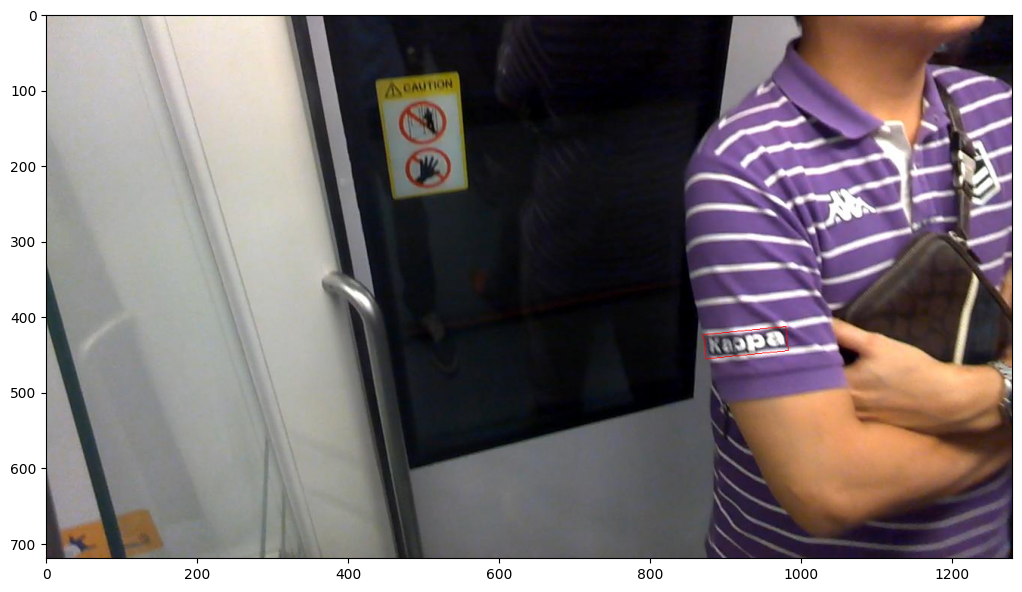

In [59]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
img_pil =Image.open(f'datasets/ic15/test_images/img_{idx}.jpg')
draw = ImageDraw.Draw(img_pil)
draw.polygon(points, outline="red")
w, h = img_pil.size
dpi = 100
fig_width = w / dpi
fig_height = h / dpi
plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

# Show the image using Matplotlib
plt.imshow(img_pil)
# plt.axis('off') # Optional, to hide the axis
plt.show()

In [ ]:
dp_slt[4:7]

[{'image_id': 2,
  'category_id': 1,
  'polys': [[667, 155], [692, 157], [692, 171], [667, 170]],
  'rec': '727',
  'score': 0.6308373808860779},
 {'image_id': 2,
  'category_id': 1,
  'polys': [[640, 136], [657, 137], [657, 151], [639, 150]],
  'rec': '97',
  'score': 0.6748589873313904},
 {'image_id': 2,
  'category_id': 1,
  'polys': [[787, 282], [820, 284], [818, 299], [786, 297]],
  'rec': 'Free',
  'score': 0.6452603340148926}]